In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cross_validation import train_test_split,  cross_val_score

In [3]:
from sklearn.grid_search import GridSearchCV

In [4]:
import warnings
warnings.filterwarnings("ignore")

# EDA

## read file

In [5]:
red = pd.read_csv('winequality-red.csv',sep = ';')
white = pd.read_csv('winequality-white.csv',sep = ';')
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## check the normalization

In [6]:
red_id, red_counts = np.unique(red['quality'],return_counts=True)
white_id, white_counts = np.unique(white['quality'],return_counts=True)

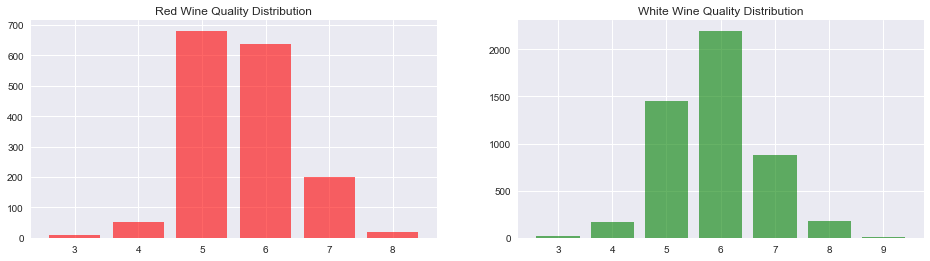

In [131]:
fig, ax = plt.subplots(1,2,figsize = (16,4))
plt.subplot(1,2,1)
p1 = plt.bar(red_id, height=red_counts,color='red',alpha=0.6)
plt.xticks(red_id)
plt.title("Red Wine Quality Distribution");

plt.subplot(1, 2, 2) 
p1 = plt.bar(white_id, height=white_counts,color='green',alpha=0.6)
plt.xticks(white_id)
plt.title("White Wine Quality Distribution");



## check null value

In [132]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [133]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## check some statistic

In [134]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [135]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## outliers

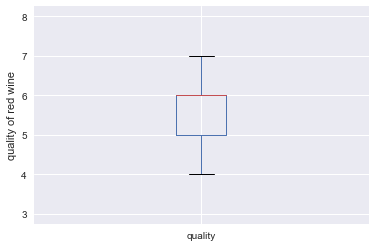

In [136]:
fig,axes = plt.subplots()
red['quality'].plot(kind='box',ax=axes)
axes.set_ylabel('quality of red wine')
fig.savefig('red_box.png')


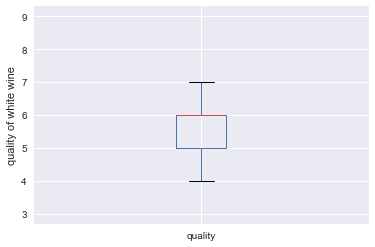

In [137]:
fig,axes = plt.subplots()
white['quality'].plot(kind='box',ax=axes)
axes.set_ylabel('quality of white wine')
fig.savefig('white_box.png')

## correlation

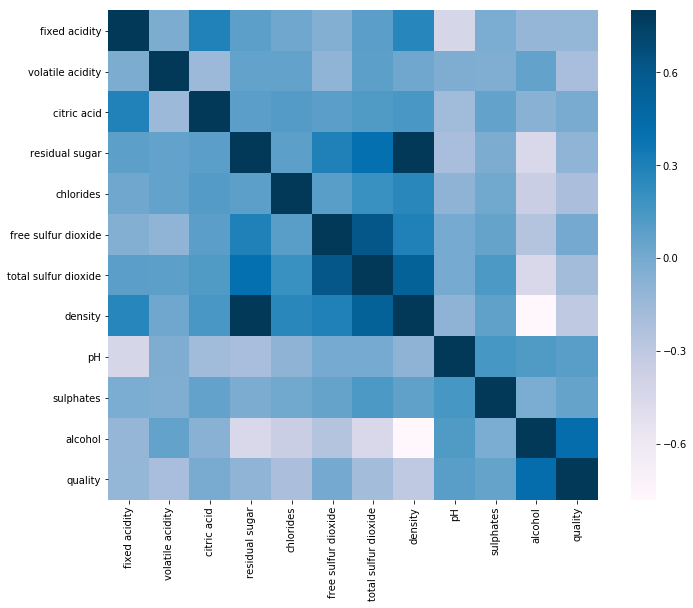

In [14]:
w_corr=white.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(w_corr,vmax=0.8,cmap='PuBu', square=True)


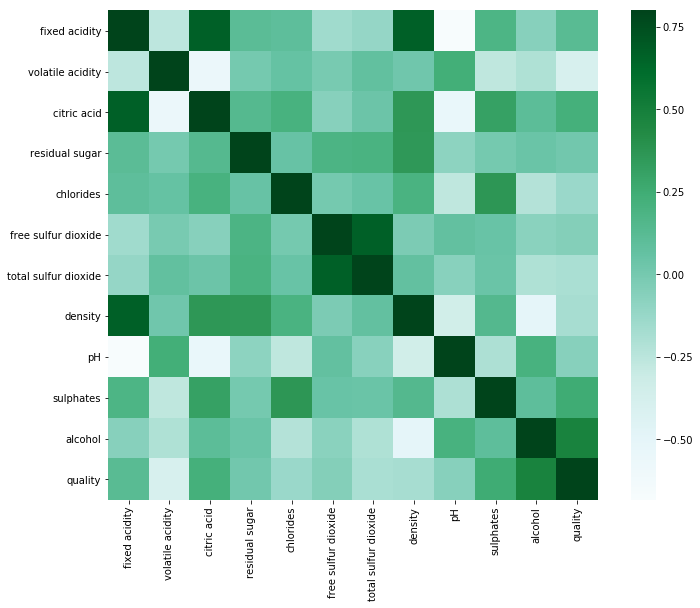

In [15]:
r_corr=red.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(r_corr,vmax=0.8,cmap='BuGn', square=True)


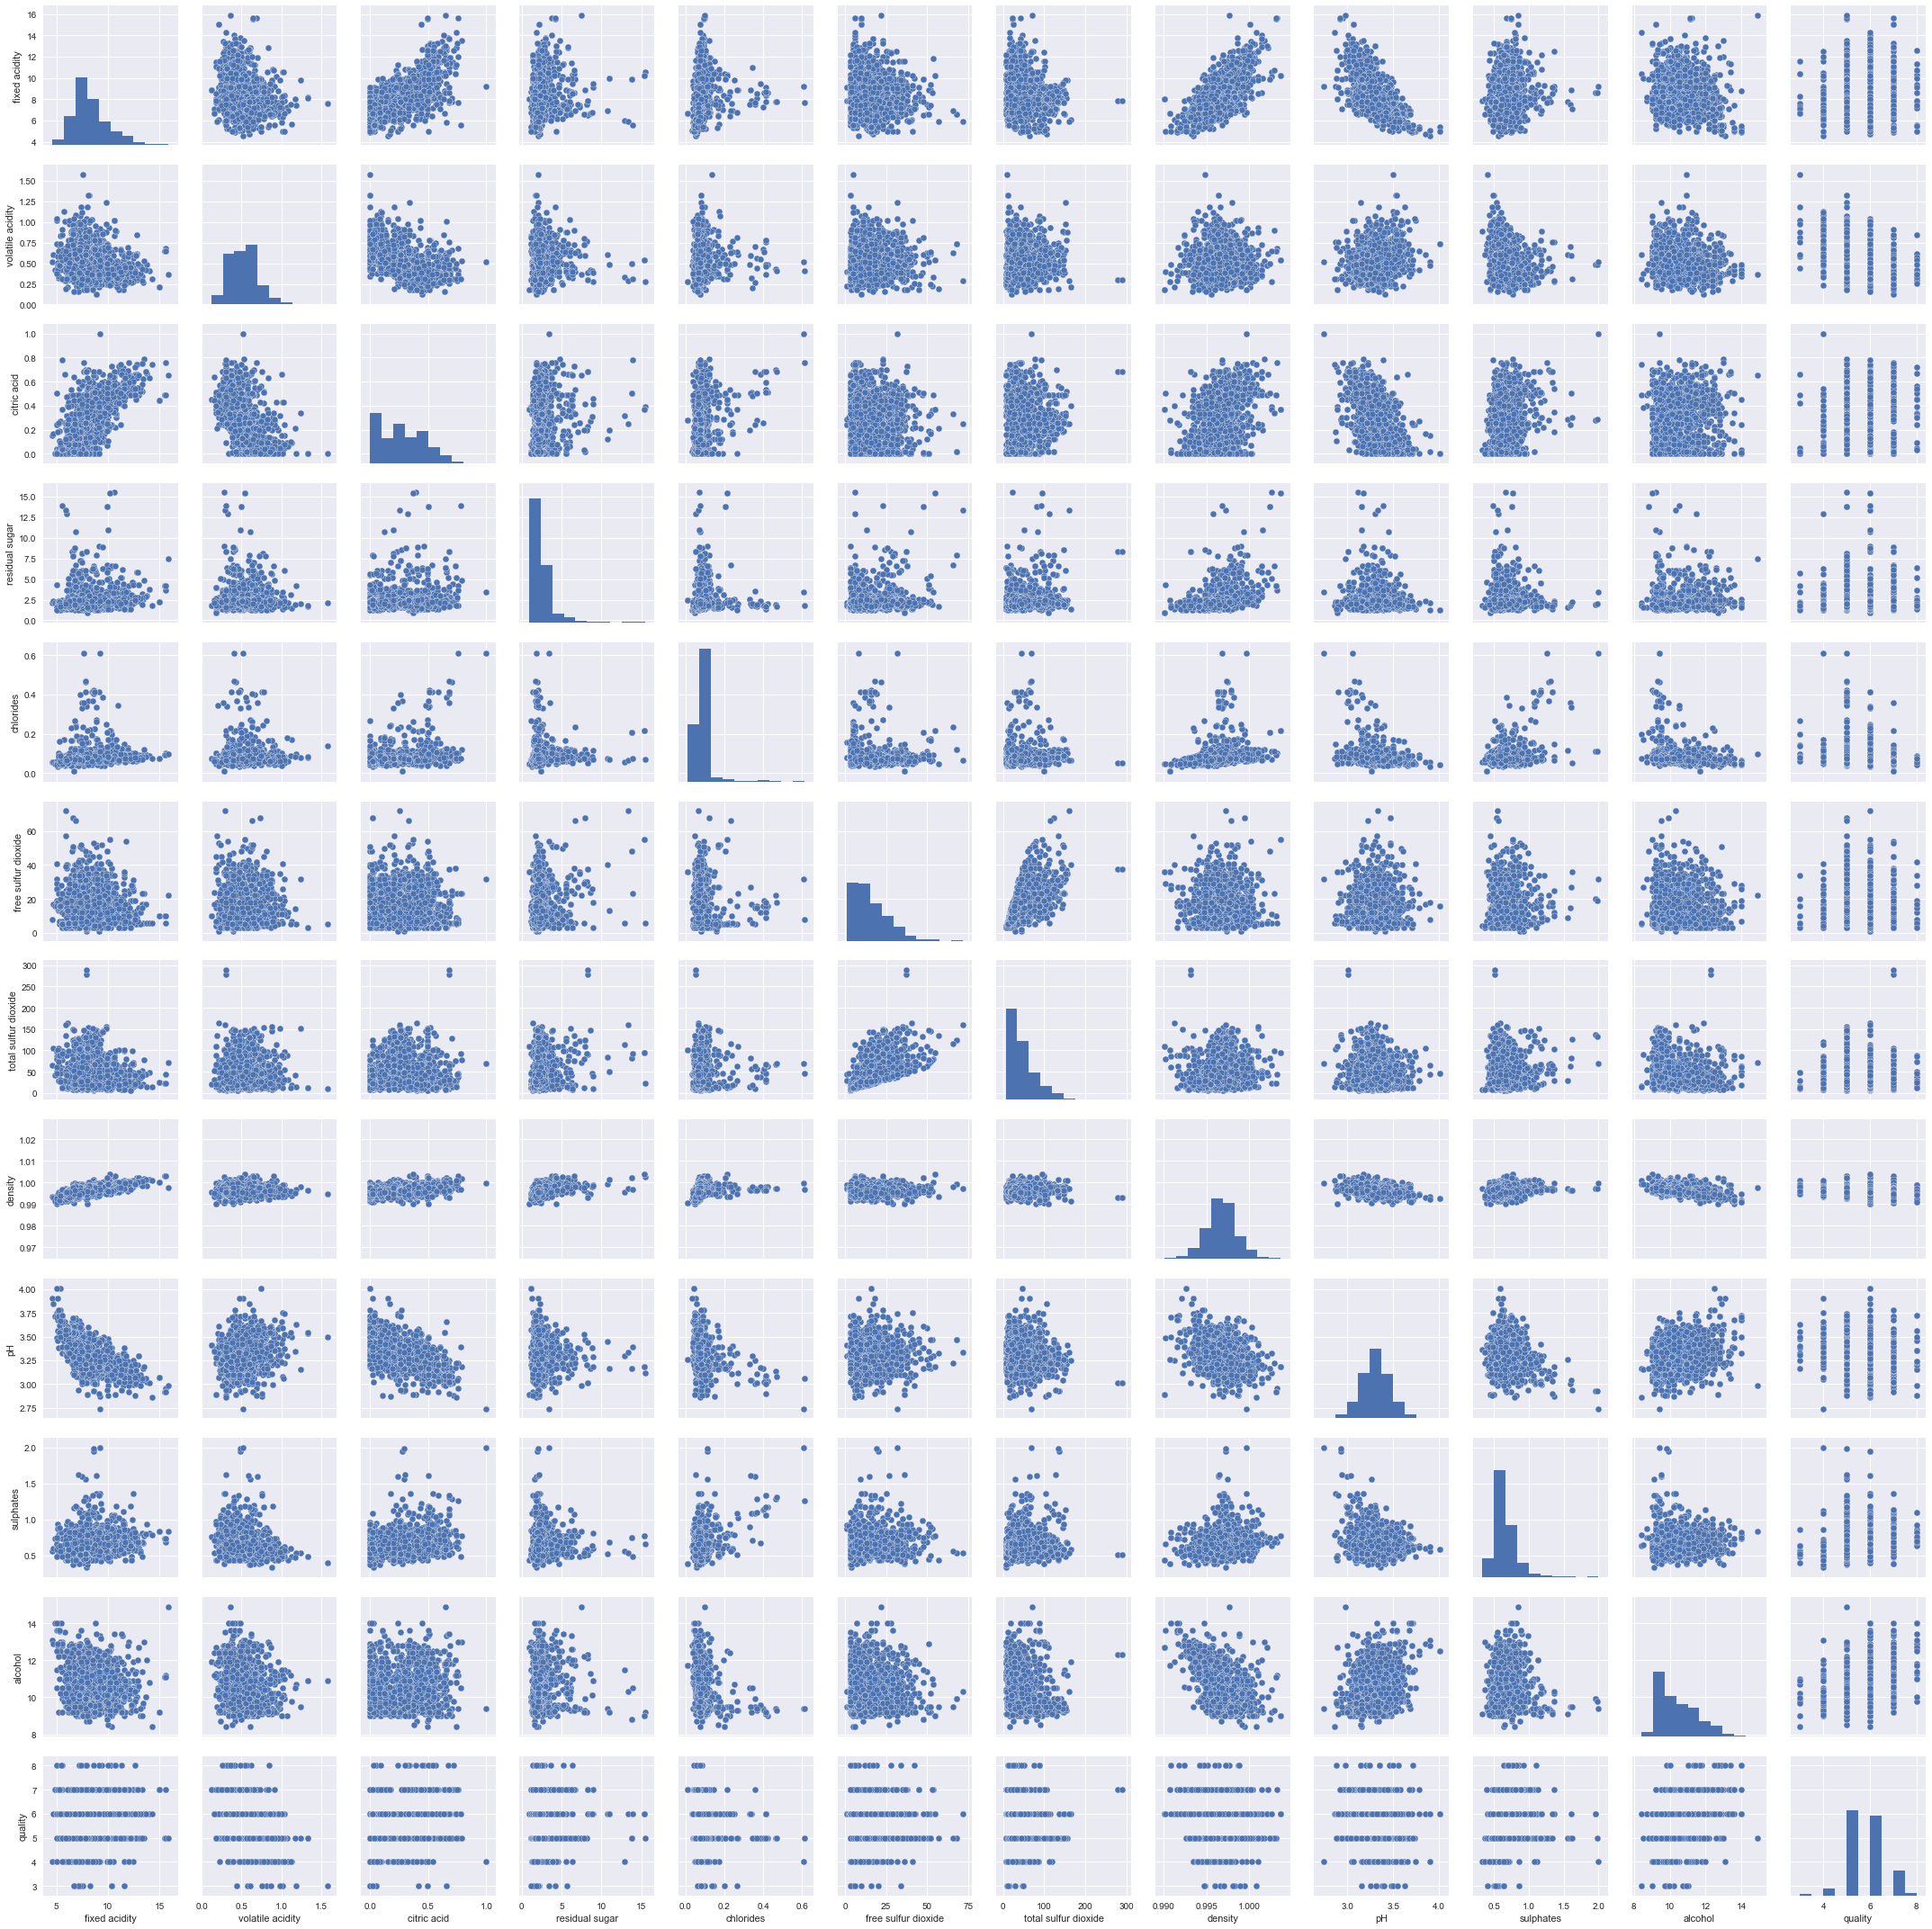

In [16]:
sns.set()
sns.pairplot(red, size = 2.5)
plt.show();

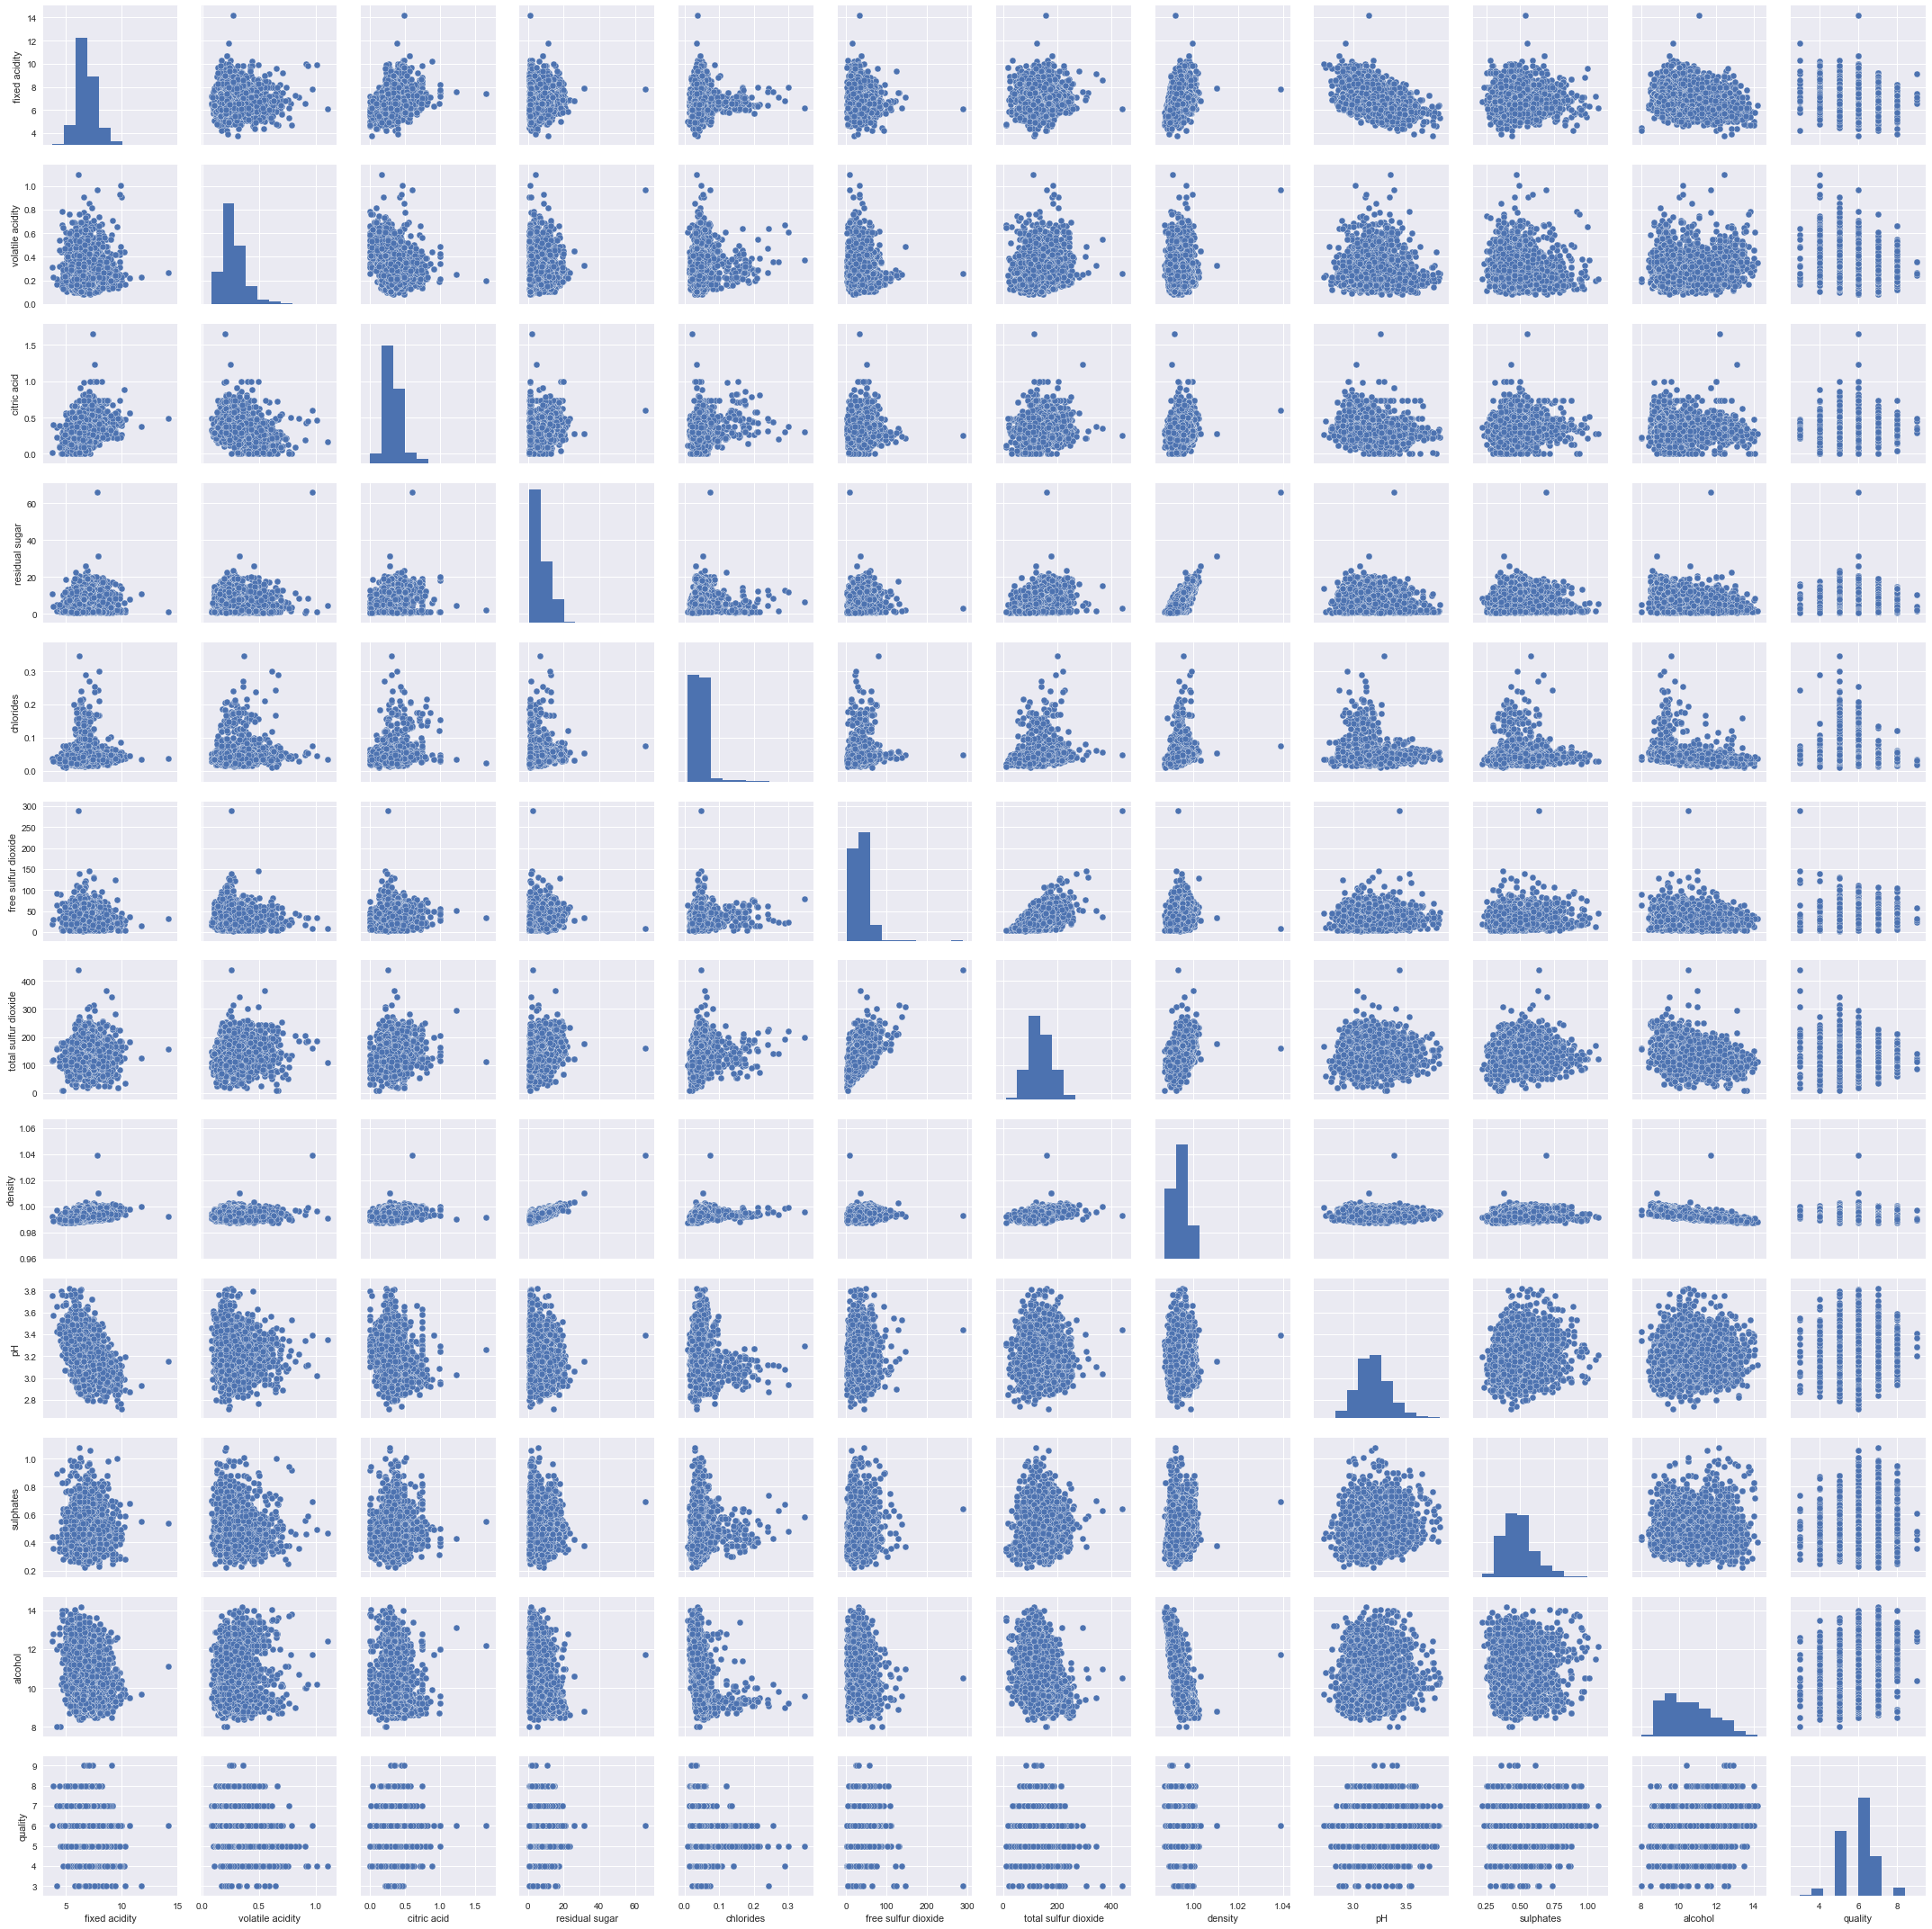

In [17]:
sns.set()
sns.pairplot(white, size = 2.5)
plt.show();

In [160]:
red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [161]:
white['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [7]:
bins = (2, 6.5, 9)
group_names = [0,1]
red_cut=pd.DataFrame(red)
white_cut=pd.DataFrame(white)
red_cut['quality'] = pd.cut(red_cut['quality'], bins = bins, labels = group_names)
white_cut['quality'] = pd.cut(white_cut['quality'], bins = bins, labels = group_names)

In [8]:
white_cut['quality'].count()

4898

In [9]:
red_y=red_cut['quality']
white_y=white_cut['quality']
red_X=red_cut.drop('quality',1)
white_X=white_cut.drop('quality',1)

In [166]:
white_y.value_counts()

0    3838
1    1060
Name: quality, dtype: int64

# Model

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.cross_validation import cross_val_score

In [11]:
train_X_red,test_X_red, train_y_red, test_y_red = train_test_split(red_X,red_y,test_size = 0.2,random_state = 0)
train_X_white,test_X_white, train_y_white, test_y_white = train_test_split(white_X,white_y,test_size = 0.2,random_state = 0)

In [12]:
sc = StandardScaler()
train_X_red = sc.fit_transform(train_X_red)
test_X_red = sc.fit_transform(test_X_red)
train_X_white = sc.fit_transform(train_X_white)
test_X_white = sc.fit_transform(test_X_white)

### RandomForestClassifier

In [169]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_X_red, train_y_red)
pred_y_red = rf.predict(test_X_red)
scores = cross_val_score(rf, train_X_red, train_y_red, cv=10)

In [170]:
scores.mean()

0.9030855154733566

In [171]:
print(classification_report(np.array(test_y_red), pred_y_red))

             precision    recall  f1-score   support

          0       0.95      0.98      0.96       290
          1       0.67      0.47      0.55        30

avg / total       0.92      0.93      0.92       320



In [172]:
accuracy_score(test_y_red,pred_y_red)

0.928125

In [173]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_X_white, train_y_white)
pred_y_white = rf.predict(test_X_white)
scores = cross_val_score(rf, train_X_white, train_y_white, cv=10)
scores.mean()

0.8800413892739307

In [174]:
print(classification_report(np.array(test_y_white), pred_y_white))

             precision    recall  f1-score   support

          0       0.88      0.95      0.91       764
          1       0.73      0.52      0.61       216

avg / total       0.84      0.85      0.84       980



In [175]:
accuracy_score(test_y_white,pred_y_white)

0.8530612244897959

### LogisticRegression

In [13]:
from sklearn.linear_model.logistic import LogisticRegression

In [177]:
lr = LogisticRegression()
lr.fit(train_X_red, train_y_red)
pred_y_red = lr.predict(test_X_red)
scores = cross_val_score(lr, train_X_red, train_y_red, cv=10)
scores.mean()

0.8648093679423793

In [178]:
print(classification_report(np.array(test_y_red), pred_y_red))

             precision    recall  f1-score   support

          0       0.94      0.93      0.94       290
          1       0.39      0.40      0.39        30

avg / total       0.89      0.88      0.89       320



In [179]:
accuracy_score(test_y_red,pred_y_red)

0.884375

In [180]:
lr = LogisticRegression(solver='liblinear')
lr.fit(train_X_white, train_y_white)
pred_y_white = lr.predict(test_X_white)
scores = cross_val_score(lr, train_X_white, train_y_white, cv=10)
scores.mean()

0.7993934779354822

In [181]:
print(classification_report(np.array(test_y_white), pred_y_white))

             precision    recall  f1-score   support

          0       0.81      0.96      0.88       764
          1       0.62      0.22      0.33       216

avg / total       0.77      0.80      0.76       980



In [182]:
accuracy_score(test_y_white,pred_y_white)

0.7989795918367347

### SVC

In [14]:
from sklearn.svm import SVC

In [184]:
svc = SVC()
svc.fit(train_X_red, train_y_red)
pred_y_red = svc.predict(test_X_red)
scores = cross_val_score(svc, train_X_red, train_y_red, cv=10)
scores.mean()

0.8757165869346274

In [185]:
print(classification_report(np.array(test_y_red), pred_y_red))

             precision    recall  f1-score   support

          0       0.93      0.98      0.96       290
          1       0.67      0.33      0.44        30

avg / total       0.91      0.92      0.91       320



In [186]:
accuracy_score(test_y_red,pred_y_red)

0.921875

In [187]:
svc = SVC()
svc.fit(train_X_white, train_y_white)
pred_y_white = svc.predict(test_X_white)
scores = cross_val_score(svc, train_X_white, train_y_white, cv=10)
print('cross_val_score:')
print(scores.mean())
print(classification_report(np.array(test_y_white), pred_y_white))
accuracy_score(test_y_white,pred_y_white)

cross_val_score:
0.8254413879723812
             precision    recall  f1-score   support

          0       0.84      0.96      0.89       764
          1       0.71      0.33      0.45       216

avg / total       0.81      0.82      0.80       980



0.8224489795918367

### KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(train_X_red, train_y_red)
pred_y_red = knn.predict(test_X_red)
scores = cross_val_score(knn, train_X_red, train_y_red, cv=10)
scores.mean()

0.8718590726667887

In [190]:
print(classification_report(np.array(test_y_red), pred_y_red))

             precision    recall  f1-score   support

          0       0.93      0.96      0.94       290
          1       0.43      0.30      0.35        30

avg / total       0.88      0.90      0.89       320



In [191]:
accuracy_score(test_y_red,pred_y_red)

0.896875

In [192]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(train_X_white, train_y_white)
pred_y_white = knn.predict(test_X_white)
scores = cross_val_score(knn, train_X_white, train_y_white, cv=10)
print('cross_val_score:')
print(scores.mean())
print(classification_report(np.array(test_y_white), pred_y_white))
accuracy_score(test_y_white,pred_y_white)

cross_val_score:
0.8259489922753037
             precision    recall  f1-score   support

          0       0.84      0.94      0.89       764
          1       0.64      0.38      0.48       216

avg / total       0.80      0.82      0.80       980



0.8163265306122449

### DecisionTreeClassifier

In [16]:
from sklearn import tree

In [194]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(train_X_red, train_y_red)
pred_y_red = dtc.predict(test_X_red)
scores = cross_val_score(dtc, train_X_red, train_y_red, cv=10)
scores.mean()

0.8702846510101935

In [195]:
print(classification_report(np.array(test_y_red), pred_y_red))

             precision    recall  f1-score   support

          0       0.97      0.91      0.94       290
          1       0.45      0.70      0.55        30

avg / total       0.92      0.89      0.90       320



In [196]:
accuracy_score(test_y_red,pred_y_red)

0.890625

In [197]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(train_X_white, train_y_white)
pred_y_white = dtc.predict(test_X_white)
scores = cross_val_score(dtc, train_X_white, train_y_white, cv=10)
print('cross_val_score:')
print(scores.mean())
print(classification_report(np.array(test_y_white), pred_y_white))
accuracy_score(test_y_white,pred_y_white)

cross_val_score:
0.8239029564696772
             precision    recall  f1-score   support

          0       0.85      0.88      0.87       764
          1       0.53      0.47      0.50       216

avg / total       0.78      0.79      0.79       980



0.7908163265306123

### GBDT

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
gbc = GradientBoostingClassifier(n_estimators=200)
gbc.fit(train_X_red, train_y_red)
pred_y_red = gbc.predict(test_X_red)
scores = cross_val_score(gbc, train_X_red, train_y_red, cv=10)
scores.mean()

0.8890165777787951

In [200]:
print(classification_report(np.array(test_y_red), pred_y_red))

             precision    recall  f1-score   support

          0       0.96      0.95      0.95       290
          1       0.55      0.57      0.56        30

avg / total       0.92      0.92      0.92       320



In [201]:
accuracy_score(test_y_red,pred_y_red)

0.915625

In [27]:
gbc = GradientBoostingClassifier(n_estimators=200)
gbc.fit(train_X_white, train_y_white)
pred_y_white = gbc.predict(test_X_white)
scores = cross_val_score(gbc, train_X_white, train_y_white, cv=10)
print('cross_val_score:')
print(scores.mean())
print(classification_report(np.array(test_y_white), pred_y_white))
accuracy_score(test_y_white,pred_y_white)

cross_val_score:
0.8425457006566317
             precision    recall  f1-score   support

          0       0.86      0.95      0.90       764
          1       0.71      0.43      0.54       216

avg / total       0.82      0.84      0.82       980



0.8357142857142857

### AdaBoostClassifier

In [18]:
from sklearn.ensemble import  AdaBoostClassifier

In [204]:
abc=AdaBoostClassifier()
abc.fit(train_X_red, train_y_red)
pred_y_red = abc.predict(test_X_red)
scores = cross_val_score(abc, train_X_red, train_y_red, cv=10)
scores.mean()

0.8686788992400659

In [205]:
print(classification_report(np.array(test_y_red), pred_y_red))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94       290
          1       0.41      0.37      0.39        30

avg / total       0.89      0.89      0.89       320



In [206]:
accuracy_score(test_y_red,pred_y_red)

0.890625

In [207]:
abc=AdaBoostClassifier()
abc.fit(train_X_white, train_y_white)
pred_y_white = abc.predict(test_X_white)
scores = cross_val_score(abc, train_X_white, train_y_white, cv=10)
print('cross_val_score:')
print(scores.mean())
print(classification_report(np.array(test_y_white), pred_y_white))
accuracy_score(test_y_white,pred_y_white)

cross_val_score:
0.8149723746119755
             precision    recall  f1-score   support

          0       0.83      0.91      0.87       764
          1       0.53      0.34      0.42       216

avg / total       0.76      0.79      0.77       980



0.7877551020408163

### GaussianNB

In [19]:
from sklearn.naive_bayes import GaussianNB

In [209]:
gnb = GaussianNB()
gnb.fit(train_X_red, train_y_red)
pred_y_red = gnb.predict(test_X_red)
scores = cross_val_score(gnb, train_X_red, train_y_red, cv=10)
scores.mean()

0.8335218862540439

In [210]:
print(classification_report(np.array(test_y_red), pred_y_red))

             precision    recall  f1-score   support

          0       0.97      0.83      0.90       290
          1       0.32      0.77      0.46        30

avg / total       0.91      0.83      0.86       320



In [211]:
accuracy_score(test_y_red,pred_y_red)

0.828125

In [212]:
gnb = GaussianNB()
gnb.fit(train_X_white, train_y_white)
pred_y_white = gnb.predict(test_X_white)
scores = cross_val_score(gnb, train_X_white, train_y_white, cv=10)
print('cross_val_score:')
print(scores.mean())
print(classification_report(np.array(test_y_white), pred_y_white))
accuracy_score(test_y_white,pred_y_white)

cross_val_score:
0.7261559386449568
             precision    recall  f1-score   support

          0       0.90      0.74      0.81       764
          1       0.44      0.71      0.54       216

avg / total       0.80      0.73      0.75       980



0.7336734693877551

### Linear Discriminant Analysis

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [214]:
lda = LinearDiscriminantAnalysis()
lda.fit(train_X_red, train_y_red)
pred_y_red = lda.predict(test_X_red)
scores = cross_val_score(lda, train_X_red, train_y_red, cv=10)
scores.mean()

0.867915817844717

In [215]:
print(classification_report(np.array(test_y_red), pred_y_red))

             precision    recall  f1-score   support

          0       0.94      0.92      0.93       290
          1       0.38      0.47      0.42        30

avg / total       0.89      0.88      0.88       320



In [216]:
accuracy_score(test_y_red,pred_y_red)

0.878125

In [217]:
lda = LinearDiscriminantAnalysis()
lda.fit(train_X_white, train_y_white)
pred_y_white = lda.predict(test_X_white)
scores = cross_val_score(lda, train_X_white, train_y_white, cv=10)
print('cross_val_score:')
print(scores.mean())
print(classification_report(np.array(test_y_white), pred_y_white))
accuracy_score(test_y_white,pred_y_white)

cross_val_score:
0.8029766436943181
             precision    recall  f1-score   support

          0       0.82      0.96      0.88       764
          1       0.63      0.27      0.38       216

avg / total       0.78      0.81      0.77       980



0.8051020408163265

### Quadratic Discriminant Analysis

In [21]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [219]:
qda=QuadraticDiscriminantAnalysis()
qda.fit(train_X_red, train_y_red)
pred_y_red = qda.predict(test_X_red)
scores = cross_val_score(qda, train_X_red, train_y_red, cv=10)
scores.mean()

0.843708703381554

In [220]:
print(classification_report(np.array(test_y_red), pred_y_red))

             precision    recall  f1-score   support

          0       0.95      0.87      0.91       290
          1       0.30      0.57      0.40        30

avg / total       0.89      0.84      0.86       320



In [221]:
accuracy_score(test_y_red,pred_y_red)

0.8375

In [222]:
qda=QuadraticDiscriminantAnalysis()
qda.fit(train_X_white, train_y_white)
pred_y_white = qda.predict(test_X_white)
scores = cross_val_score(qda, train_X_white, train_y_white, cv=10)
print('cross_val_score:')
print(scores.mean())
print(classification_report(np.array(test_y_white), pred_y_white))
accuracy_score(test_y_white,pred_y_white)

cross_val_score:
0.7608760729648647
             precision    recall  f1-score   support

          0       0.89      0.78      0.83       764
          1       0.46      0.66      0.55       216

avg / total       0.80      0.76      0.77       980



0.7571428571428571

### xgboost

In [115]:
import xgboost

In [116]:
xgb = xgboost.XGBClassifier()
xgb.fit(train_X_red, train_y_red)
pred_y_red = xgb.predict(test_X_red)
scores = cross_val_score(xgb, train_X_red, train_y_red, cv=10)
scores.mean()

0.8992096418543613

In [225]:
print(classification_report(np.array(test_y_red), pred_y_red))

             precision    recall  f1-score   support

          0       0.96      0.93      0.95       290
          1       0.50      0.63      0.56        30

avg / total       0.92      0.91      0.91       320



In [226]:
accuracy_score(test_y_red,pred_y_red)

0.90625

In [227]:
xgb = xgboost.XGBClassifier()
xgb.fit(train_X_white, train_y_white)
pred_y_white = xgb.predict(test_X_white)
scores = cross_val_score(xgb, train_X_white, train_y_white, cv=10)
print('cross_val_score:')
print(scores.mean())
print(classification_report(np.array(test_y_white), pred_y_white))
accuracy_score(test_y_white,pred_y_white)

cross_val_score:
0.8754456180082387
             precision    recall  f1-score   support

          0       0.89      0.93      0.91       764
          1       0.71      0.60      0.65       216

avg / total       0.85      0.86      0.85       980



0.8571428571428571

# parameter selection

### Random forest

In [113]:
param_test1 = [{'n_estimators':list(range(10,71,10))}]
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                        min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(train_X_red, train_y_red)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=20, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 20, 30, 40, 50, 60, 70]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [114]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.87127, std: 0.04377, params: {'n_estimators': 10},
  mean: 0.87575, std: 0.05073, params: {'n_estimators': 20},
  mean: 0.87831, std: 0.05055, params: {'n_estimators': 30},
  mean: 0.87526, std: 0.05272, params: {'n_estimators': 40},
  mean: 0.87537, std: 0.05165, params: {'n_estimators': 50},
  mean: 0.87594, std: 0.05055, params: {'n_estimators': 60},
  mean: 0.87558, std: 0.05026, params: {'n_estimators': 70}],
 {'n_estimators': 30},
 0.8783076844241597)

In [229]:
param_test2 = [{'max_depth':list(range(3,14,2)), 'min_samples_split':list(range(50,201,20))}]
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 30, 
                        min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
                        param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(train_X_red, train_y_red)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 5, 'min_samples_split': 50}, 0.883771585691775)

In [232]:
param_test3 = [{ 'min_samples_leaf':list(range(10,60,10))}]
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 30, max_depth=5,
                        max_features='sqrt' ,oob_score=True, random_state=10,min_samples_split=50),
                        param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(train_X_red, train_y_red)
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 10}, 0.8845444334421269)

In [233]:
param_test4 = [{'max_features':list(range(3,11,2))}]
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 30, max_depth=5, min_samples_split=50,
                        min_samples_leaf=10 ,oob_score=True, random_state=10),
                       param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(train_X_red, train_y_red)
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 3}, 0.8845444334421269)

In [234]:
rf = RandomForestClassifier(n_estimators= 30, max_depth=5, min_samples_split=50,min_samples_leaf=10 ,oob_score=True, random_state=10,max_features=3)
rf.fit(train_X_red, train_y_red)
pred_y_red = rf.predict(test_X_red)
scores = cross_val_score(rf, train_X_red, train_y_red, cv=10)
print('cross_val_score:')
print(scores.mean())
print(classification_report(np.array(test_y_red), pred_y_red))
accuracy_score(test_y_red,pred_y_red)

cross_val_score:
0.8640281179423793
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       290
          1       0.75      0.30      0.43        30

avg / total       0.91      0.93      0.91       320



0.925

In [235]:
param_test1 = [{'n_estimators':list(range(10,71,10))}]
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                        min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(train_X_white, train_y_white)
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 70}, 0.8475904084836334)

In [237]:
param_test2 = [{'max_depth':list(range(3,14,2)), 'min_samples_split':list(range(50,201,20))}]
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70, 
                        min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
                        param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(train_X_white, train_y_white)
gsearch2.best_params_, gsearch1.best_score_

({'max_depth': 11, 'min_samples_split': 50}, 0.8475904084836334)

In [238]:
param_test3 = [{ 'min_samples_leaf':list(range(10,60,10))}]
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70, max_depth=11,
                        max_features='sqrt' ,oob_score=True, random_state=10,min_samples_split=50),
                        param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(train_X_white, train_y_white)
gsearch3.best_params_, gsearch1.best_score_

({'min_samples_leaf': 10}, 0.8475904084836334)

In [239]:
param_test4 = [{'max_features':list(range(3,11,2))}]
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70, max_depth=11, min_samples_split=50,
                        min_samples_leaf=10 ,oob_score=True, random_state=10),
                       param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(train_X_white, train_y_white)
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 3}, 0.8623317815639104)

In [242]:
rf = RandomForestClassifier(n_estimators= 70, max_depth=11, min_samples_split=50,
                        min_samples_leaf=10 ,oob_score=True, random_state=10,max_features=3)
rf.fit(train_X_white, train_y_white)
pred_y_white = rf.predict(test_X_white)
scores = cross_val_score(rf, train_X_white, train_y_white, cv=10)
print('cross_val_score:')
print(scores.mean())
print(classification_report(np.array(test_y_white), pred_y_white))
accuracy_score(test_y_white,pred_y_white)

cross_val_score:
0.8366802678588859
             precision    recall  f1-score   support

          0       0.84      0.96      0.90       764
          1       0.72      0.36      0.48       216

avg / total       0.81      0.83      0.80       980



0.8275510204081633

### SVC

In [244]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
gridsvc = GridSearchCV(estimator = SVC(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
gridsvc.fit(train_X_red, train_y_red)
gridsvc.best_params_, gridsvc.best_score_

({'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}, 0.8897576231430805)

In [24]:
svc = SVC(C=1,gamma=0.9,kernel='rbf')
svc.fit(train_X_red, train_y_red)
pred_y_red =svc.predict(test_X_red)
scores = cross_val_score(svc, train_X_red, train_y_red, cv=10)
print('cross_val_score:')
print(scores.mean())
print(classification_report(np.array(test_y_red), pred_y_red))
accuracy_score(test_y_red,pred_y_red)

cross_val_score:
0.8936982123237502
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       290
          1       0.83      0.50      0.62        30

avg / total       0.94      0.94      0.94       320



0.94375

In [25]:
svc = SVC(C=1,gamma=0.9,kernel='rbf')
svc.fit(train_X_white, train_y_white)
pred_y_white = svc.predict(test_X_white)
scores = cross_val_score(svc, train_X_white, train_y_white, cv=10)
print('cross_val_score:')
print(scores.mean())
print(classification_report(np.array(test_y_white), pred_y_white))
accuracy_score(test_y_white,pred_y_white)

cross_val_score:
0.8652492792669673
             precision    recall  f1-score   support

          0       0.86      0.96      0.91       764
          1       0.75      0.45      0.56       216

avg / total       0.84      0.85      0.83       980



0.8459183673469388

### Ensemble Learning

In [117]:
from sklearn.ensemble import VotingClassifier

In [118]:
svc = SVC(C=1,gamma=0.9,kernel='rbf')
xgb = xgboost.XGBClassifier()
rf = RandomForestClassifier(n_estimators= 70, max_depth=11, min_samples_split=50,
                        min_samples_leaf=10 ,oob_score=True, random_state=10,max_features=3)
em = VotingClassifier(estimators=[('rf',rf), ('xgb', xgb),('svc',svc)], voting='hard')
em.fit(train_X_red, train_y_red)
pred_y_red =em.predict(test_X_red)
scores = cross_val_score(em, train_X_red, train_y_red, cv=10)
print('cross_val_score:')
print(scores.mean())
print(classification_report(np.array(test_y_red), pred_y_red))
accuracy_score(test_y_red,pred_y_red)

cross_val_score:
0.8913726309284014
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       290
          1       0.88      0.47      0.61        30

avg / total       0.94      0.94      0.94       320



0.94375

In [119]:
svc = SVC(C=1,gamma=0.9,kernel='rbf')
xgb = xgboost.XGBClassifier()
rf = RandomForestClassifier(n_estimators= 70, max_depth=11, min_samples_split=50,
                        min_samples_leaf=10 ,oob_score=True, random_state=10,max_features=3)
em = VotingClassifier(estimators=[('rf',rf), ('xgb', xgb),('svc',svc)], voting='hard')
em.fit(train_X_white, train_y_white)
pred_y_white = em.predict(test_X_white)
scores = cross_val_score(em, train_X_white, train_y_white, cv=10)
print('cross_val_score:')
print(scores.mean())
print(classification_report(np.array(test_y_white), pred_y_white))
accuracy_score(test_y_white,pred_y_white)

cross_val_score:
0.8703643687810338
             precision    recall  f1-score   support

          0       0.87      0.96      0.91       764
          1       0.76      0.50      0.60       216

avg / total       0.85      0.86      0.84       980



0.8551020408163266

## NN

In [101]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(11,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [102]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [107]:
model.fit(train_X_red, train_y_red,epochs=20,batch_size=100)
model.evaluate(test_X_red,test_y_red)


Epoch 1/20
1279/1279 [==============================] - 0s 65us/step - loss: 0.3260 - acc: 0.8741
Epoch 2/20
1279/1279 [==============================] - 0s 59us/step - loss: 0.3251 - acc: 0.8741
Epoch 3/20
1279/1279 [==============================] - 0s 64us/step - loss: 0.3248 - acc: 0.8741
Epoch 4/20
1279/1279 [==============================] - 0s 77us/step - loss: 0.3243 - acc: 0.8726

[0.2771384850144386, 0.9]

In [104]:
model.fit(train_X_white, train_y_white,epochs=20,batch_size=100)
model.evaluate(test_X_white,test_y_white)

Epoch 1/20
3918/3918 [==============================] - 0s 64us/step - loss: 0.4295 - acc: 0.8081
Epoch 2/20
3918/3918 [==============================] - 0s 68us/step - loss: 0.4264 - acc: 0.8091
Epoc

[0.42836298699281655, 0.8071428568995729]

Epoch 1/20
1279/1279 [==============================] - 0s 65us/step - loss: 0.3874 - acc: 0.8554
Epoch 2/20
1279/1279 [==============================] - 0s 66us/step - loss: 0.3837 - acc: 0.8608
Epoch 3/20
1279/1279 [==============================] - 0s 63us/step - loss: 0.3561 - acc: 0.8624
Epoch 4/20
1279/1279 [==============================] - 0s 73us/step - loss: 0.3651 - acc: 0.8647

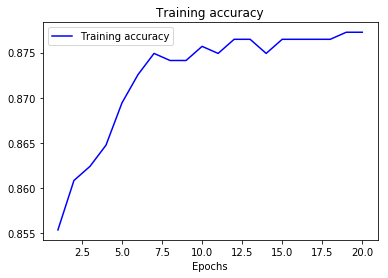

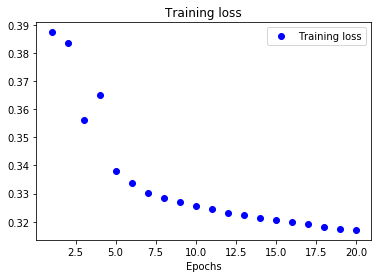

In [114]:
aName = model.fit(train_X_red, train_y_red,epochs=20,batch_size=100).history
lv = aName['loss']
val_lv = aName['acc']

epochs = range(1, len(lv) + 1)

#plt.plot(epochs, lv, 'bo', label='Training loss')
plt.plot(epochs, val_lv, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.plot(epochs, lv, 'bo', label='Training loss')
#plt.plot(epochs, val_lv, 'b', label='Training accuracy')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()


Epoch 1/20
3918/3918 [==============================] - 0s 63us/step - loss: 0.8363 - acc: 0.7654
Epoch 2/20
3918/3918 [==============================] - 0s 66us/step - loss: 0.5389 - acc: 0.7973
Epoc

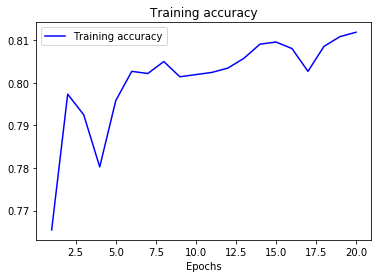

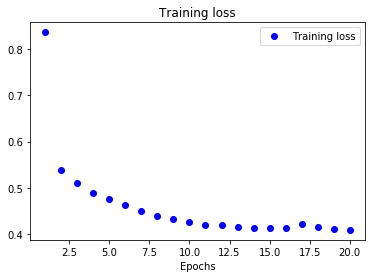

In [113]:
aName = model.fit(train_X_white, train_y_white,epochs=20,batch_size=100).history
lv = aName['loss']
val_lv = aName['acc']

epochs = range(1, len(lv) + 1)

#plt.plot(epochs, lv, 'bo', label='Training loss')
plt.plot(epochs, val_lv, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.plot(epochs, lv, 'bo', label='Training loss')
#plt.plot(epochs, val_lv, 'b', label='Training accuracy')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()
